<a href="https://colab.research.google.com/github/Sophiajackrich/Stutern-repo/blob/master/Module_7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: JACKRICH SOPHIA 

In [ ]:
# !pip install SQLAlchemy

In [2]:
!pip install nb_black

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.0 MB/s 
     |████████████████████████████████| 96 kB 5.8 MB/s 
     |████████████████████████████████| 1.6 MB 40.4 MB/s 
  Created wheel for nb-black: filename=nb_black-1.0.7-py3-none-any.whl size=5298 sha256=b5873830f29e0a8b7cd04db9a6f755936b7a90899d0d0d3b918d13dfbca685ee
  Stored in directory: /root/.cache/pip/wheels/a6/5e/1e/a15614d6ea220d070043db3b650d73a8b4938aefd520496c11
Successfully built nb-black
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [113]:
# Standard imports
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Database libraries
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
from pandas import read_sql_query, read_sql_table

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 600

# Black code formatter (Optional)
%reload_ext lab_black
# auto reload imports
%reload_ext autoreload
%autoreload 2

In [114]:
# loading the database to see what it contains by using magic commands
%reload_ext sql
%sql sqlite:////content/attr_data.db

'Connected: @/content/attr_data.db'

In [115]:
%%sql 
SELECT * FROM sqlite_master

 * sqlite:////content/attr_data.db
Done.


type,name,tbl_name,rootpage,sql
table,attrition_records,attrition_records,2,"CREATE TABLE attrition_records ( id INTEGER PRIMARY KEY AUTOINCREMENT, Age INT, Attrition TEXT, BusinessTravel TEXT, DailyRate INT, Department TEXT, DistanceFromHome INT, Education INT, EducationField TEXT, EmployeeCount INT, EmployeeNumber INT, EnvironmentSatisfaction, Gender TEXT, HourlyRate INT, JobInvolvement INT, JobLevel INT, JobRole TEXT, JobSatisfaction INT, MaritalStatus TEXT, MonthlyIncome INT, MonthlyRate INT, NumCompaniesWorked INT, Over18 TEXT, OverTime TEXT, PercentSalaryHike INT, PerformanceRating INT, RelationshipSatisfaction INT, StandardHours INT, StockOptionLevel INT, TotalWorkingYears INT, TrainingTimesLastYear INT, WorkLifeBalance INT, YearsAtCompany INT, YearsInCurrentRole INT, YearsSinceLastPromotion INT, YearsWithCurrManager INT )"
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [116]:
# Using a function to turn database to pandas format
def query_db(sql_query: str, db_conn: create_engine) -> pd.DataFrame: #(Pandas)
    """This reads SQL query or database table into a DataFrame.
    Parameter
    ---------
    sql_query: str
         The input SQL query,
    db_conn: An instance of create_engine
        This enables you to connect to your database.
    Returns
    -------
    result_df: Pandas DF
    """
    result_df = pd.read_sql(sql=sql_query, con=db_conn)
    return result_df

In [117]:
sqlite_conn = sqlite3.connect("attr_data.db")

sql_query = """SELECT * FROM attrition_records LIMIT 10"""
query_db(sql_query, db_conn=sqlite_conn)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,7,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,8,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,9,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,10,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


# Extract Data From Database into Pandas DataFrame

In [188]:
# Extract database to pandas DataFrame
data = pd.read_sql_query("SELECT * FROM attrition_records",sqlite_conn)
data

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1467,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1468,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1469,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [13]:
# Set index to ID
data = data.set_index("id")

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Analysing the Attrition records

In [119]:
# Analysing the Attrition records
# check info and shape
print(data.info()) # The information shows that there are no missing data and shows that each column has correct dtype and uses camel casing for name format.
print("The shape of the data is:", data.shape) # The shape shows the columns and observations of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [120]:
# data[["EmployeeNumber", 
#       "EnvironmentSatisfaction",
#       "Gender",
#       "HourlyRate", 
#       "JobInvolvement",
#       "JobLevel", 
#       "JobRole",
#       "JobSatisfaction",            
#       "MaritalStatus",           
#       "MonthlyIncome",                  
#       "MonthlyRate",
#       "NumCompaniesWorked",       
#       "Over18",             
#       "OverTime",              
#       "PercentSalaryHike",         
#       "PerformanceRating" ]].head()

In [121]:
# Check for duplicates
print(data.duplicated().value_counts())

False    1470
dtype: int64


# Data Description

In [210]:
data_dict= {"education": {
    "1": "Below College",
    "2": "College",
    "3": "Bachelor",
    "4": "Master",
    "5": "Doctor"
},
 "environmentsatisfaction": {
    "1": "low",
    "2": "Medium",
    "3": "High",
    "4": "Very High"
},
 "jobinvolvement": {
    "1": "low",
    "2": "Medium",
    "3": "High",
    "4": "Very High"
},
 "jobsatisfaction": {
    "1": "low",
    "2": "Medium",
    "3": "High",
    "4": "Very High"
},
 "performancerating": {
    "1": "low",
    "2": "Good",
    "3": "Excellent",
    "4": "Outstanding"
},
 "relationshipSatisfaction": {
    "1": "low",
    "2": "Good",
    "3": "Excellent",
    "4": "Outstanding"
},
 "workLifeBalance": {
    "1": "Bad",
    "2": "Good",
    "3": "Better",
    "4": "Best"
},
}

In [122]:
data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Exploring and Visualizing Data

In [123]:
# Split into numerical and categorical data
numerical_vars = [var for var in data.columns if data[var].dtype != "O"]
categorical_vars = [var for var in data.columns if data[var].dtype == "O"]

numerical_vars, categorical_vars

(['id',
  'Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeCount',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StandardHours',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 ['Attrition',
  'BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'Over18',
  'OverTime'])

In [124]:
# Grouping the entire data by the Attrition Column and assigning to a variable to view result
attrix = data.groupby('Attrition').sum().round(2)
attriv = data.groupby('Attrition').sum().round(2)

print(attrix)
print(attriv)

               id    Age  DailyRate  DistanceFromHome  Education  \
Attrition                                                          
No         909250  46313    1001818             10993       3609   
Yes        171935   7965     177836              2520        673   

           EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
Attrition                                                                       
No                  1233         1267100                     3417       81319   
Yes                  237          239452                      584       15541   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
No                   3416      2646             3426        8424768   
Yes                   597       388              585        1134541   

           MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
Attrition                                           

In [125]:
attr_index = data['Attrition'].value_counts().index
attr_val = data['Attrition'].value_counts().values
print(attr_index)
print(attr_val)


Index(['No', 'Yes'], dtype='object')
[1233  237]


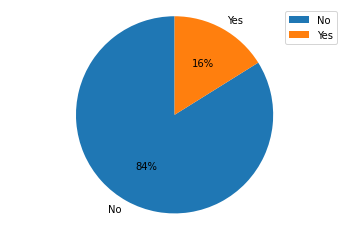

In [126]:
# Pie chart of the attrition in the whole dataset
plt.pie(attr_val, labels = attr_index, autopct='%1.0f%%',  startangle=90)
plt.legend(loc="best")
plt.axis('equal')
plt.show()

In [127]:
#Getting the bar charts for both categorical and numerical variables:
attr = data.groupby('Attrition')['Age'].sum().round(2).index
age = data.groupby('Attrition')['Age'].sum().round(2).values

print(attr)
print(age)



Index(['No', 'Yes'], dtype='object', name='Attrition')
[46313  7965]


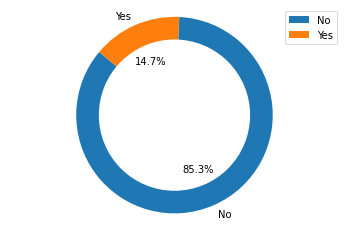

In [128]:
# Creating a pie chart as the base of my donut chart. 
plt.pie(age, labels=attr, autopct='%1.1f%%', startangle=140)

# Next, i create a circle at the center of the base plot
centre_circle = plt.Circle((0,0),0.77, fc='white',linewidth=1.25)
fig = plt.gcf() # <-- Matplotlib command to get the current figure for further manipulation. 
# Add the circle to my base pie chart
fig.gca().add_artist(centre_circle)

plt.legend(loc="best")
plt.axis('equal')
plt.show()

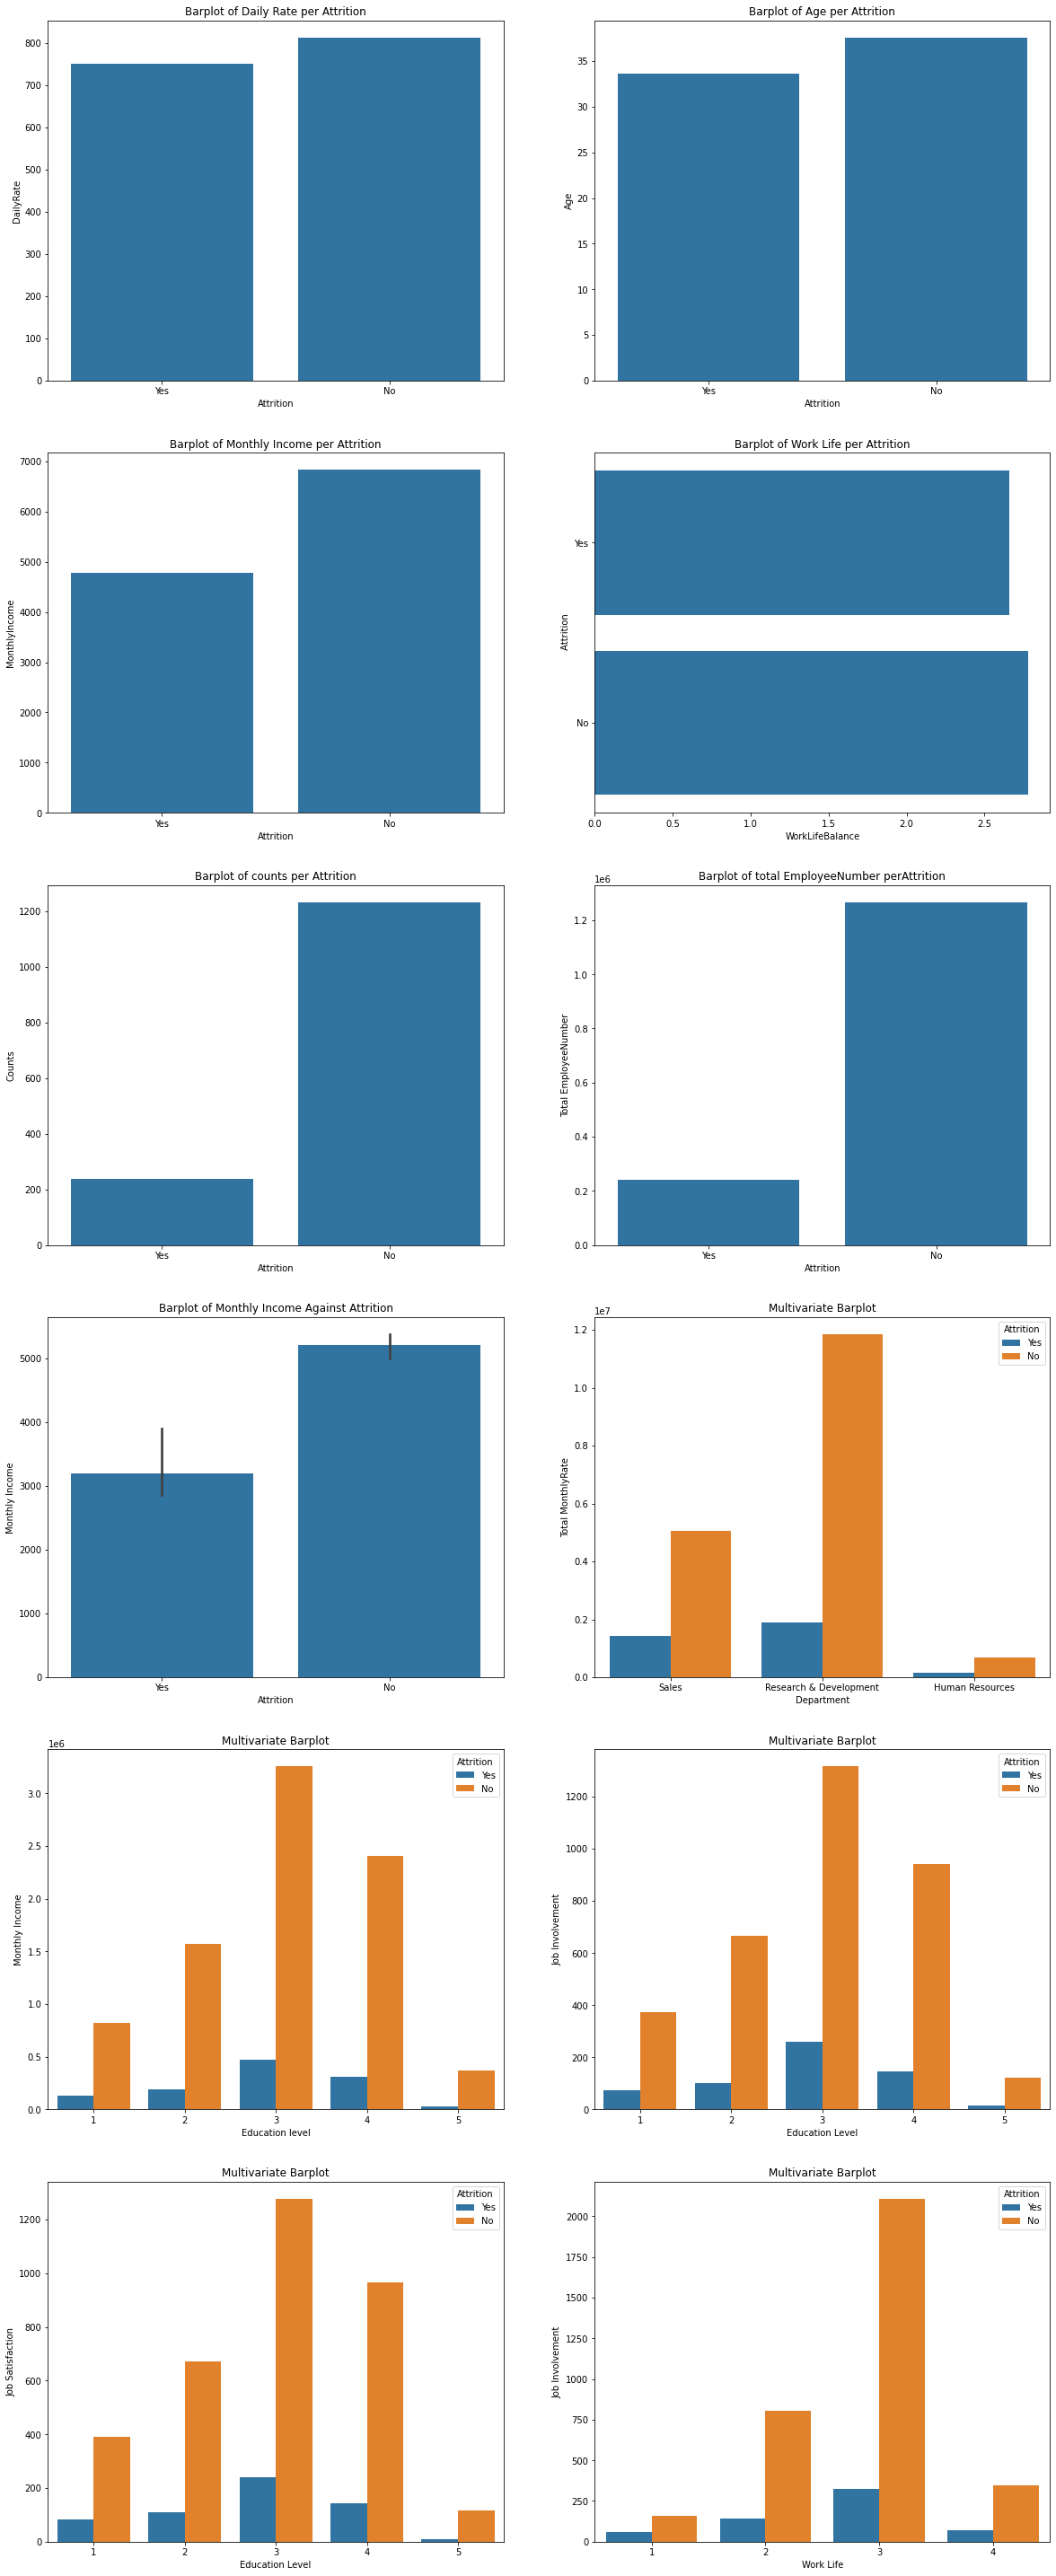

In [129]:
# fig, (ax1,ax2, ax3, ax4) = plt.subplots(2,2, figsize=[15,9])
plt.figure(figsize=[20,50])
base_color = sns.color_palette()[0]

# First subplot
# Barchart of Attrition against DailyRate (bivariate)
plt.subplot(6,2,1)
ax = sns.barplot(data=data, x='Attrition', y='DailyRate', color=base_color, ci=None)
plt.title('Barplot of Daily Rate per Attrition')
plt.xlabel('Attrition')
plt.ylabel('DailyRate')

# Second subplot
# Barchart of Attrition against Age (bivariate)
plt.subplot(6,2,2)
ax = sns.barplot(data=data, x='Attrition', y='Age', color=base_color, ci=None)
plt.title('Barplot of Age per Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')


# Third subplot
# Barchart of Attrition against MonthlyIncome (bivariate)
plt.subplot(6,2,3)
ax = sns.barplot(data=data, x='Attrition', y='MonthlyIncome', color=base_color, ci=None)
plt.title('Barplot of Monthly Income per Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')


# Fouth subplot
# Barchart of Attrition against DailyRate (bivariate)
plt.subplot(6,2,4)
ax = sns.barplot(data=data, x='WorkLifeBalance', y='Attrition', color=base_color, ci=None)
plt.title('Barplot of Work Life per Attrition')
plt.xlabel('WorkLifeBalance')
plt.ylabel(' Attrition')

# Fifth subplot
# Barchart of Attrition against Its counts: Univariate
plt.subplot(6,2,5)
ax1 = sns.countplot(data=data, x='Attrition', color=base_color)
plt.title('Barplot of counts per Attrition')
plt.xlabel('Attrition')
plt.ylabel('Counts')

# Sixth subplot
# Barchart of Attrition against Total EmployeeNumber: bivariate
plt.subplot(6,2,6)
ax = sns.barplot(data=data, x='Attrition', y='EmployeeNumber', color=base_color, estimator=np.sum, ci=None)
plt.title('Barplot of total EmployeeNumber perAttrition')
ax.set_xlabel('Attrition')
ax.set_ylabel('Total EmployeeNumber')


# # Fourth subplot
# # Histogram of Quantity against its counts
# plt.subplot(3,2,4)
# # data["Attrition"] = data["Attrition"].replace("Yes", 1)
# # data["Attrition"] = data["Attrition"].replace("No", 0)
# ax2 = sns.histplot(data=data, x='Quantity', color = 'g', bins=10)
# ax2.set_title('Histogram for Quantity')
# ax2.set_xlabel('Quantity')
# ax2.set_ylabel('Counts')

# Seventh subplot
# Barchart of Region against Median Sales: Bivariate
plt.subplot(6,2,7)
ax2 = sns.barplot(data=data, x='Attrition', y='MonthlyIncome', color=base_color, estimator=np.median)
ax2.set_title('Barplot of Monthly Income Against Attrition')
ax2.set_xlabel('Attrition')
ax2.set_ylabel('Monthly Income')

# Eight subplot
# Multivariate plot
plt.subplot(6,2,8)
ax2 = sns.barplot(data=data, x='Department', y='MonthlyRate', hue='Attrition', estimator=np.sum, ci=None)
ax2.set_title('Multivariate Barplot')
ax2.set_xlabel('Department')
ax2.set_ylabel('Total MonthlyRate')

# Nineth subplot
# Multivariate plot
plt.subplot(6,2,9)
ax2 = sns.barplot(data=data, x='Education', y='MonthlyIncome', hue='Attrition', estimator=np.sum, ci=None)
ax2.set_title('Multivariate Barplot')
ax2.set_xlabel('Education level')
ax2.set_ylabel('Monthly Income')

# Tenth subplot
# Multivariate plot
plt.subplot(6,2,10)
ax2 = sns.barplot(data=data, x='Education', y='JobInvolvement', hue='Attrition', estimator=np.sum, ci=None)
ax2.set_title('Multivariate Barplot')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Job Involvement')


# Eleventh subplot
# Multivariate plot
plt.subplot(6,2,11)
ax2 = sns.barplot(data=data, x='Education', y= 'JobSatisfaction', hue= 'Attrition', estimator=np.sum, ci=None)
ax2.set_title('Multivariate Barplot')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Job Satisfaction')

# Twelvth subplot
# Multivariate plot
plt.subplot(6,2,12)
ax2 = sns.barplot(data=data, x='WorkLifeBalance', y= 'JobInvolvement', hue= 'Attrition', estimator=np.sum, ci=None)
ax2.set_title('Multivariate Barplot')
ax2.set_xlabel('Work Life')
ax2.set_ylabel('Job Involvement')


plt.subplots_adjust(wspace=0.2, hspace=0.2,bottom=0.1);

# Scatterplot Analysis of two columns against Attrition

0.0088

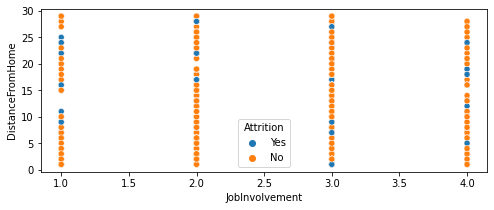

In [194]:
# Multivariate analysis: 2 numeric and 1 categorical variables
plt.figure(figsize=[8,3])
sns.scatterplot(data=data, x='JobInvolvement', y='DistanceFromHome', hue='Attrition'); # There is no relationship between this two columns.

data["JobInvolvement"].corr(data["DistanceFromHome"]).round(4) # This is a very weak positive correlation

0.7735

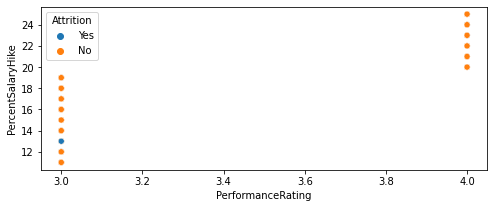

In [200]:
# Multivariate analysis: 2 numeric and 1 categorical variables
plt.figure(figsize=[8,3])
sns.scatterplot(data=data, x='PerformanceRating', y='PercentSalaryHike', hue='Attrition'); 
# This shows that between this two columns, there is barely a reason for attrition in this category of employers.

data["PerformanceRating"].corr(data["PercentSalaryHike"]).round(4)
# This is a strong positive correlation between the both colums, meaning one most likely affects one.

In [130]:
# Checking if the data is skew
print(data.skew()) # the symmetry of the distribution
print(data.kurt()) #the heaviness of the distribution tails.

id                          0.000000
Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

<ipython-input-130-89bbebe23e57>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.skew()) # the symmetry of the distribution
<ipython-input-130-89bbebe23e57>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.kurt()) #the heaviness of the distribution tails.


# Scatterplot of multivariate variables and an Encoded Column used as the 'hue'

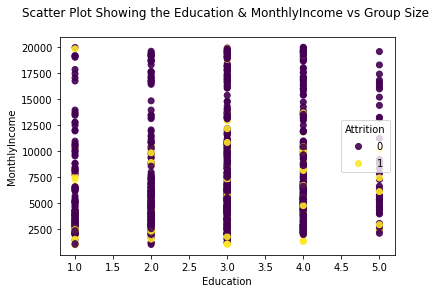

In [202]:
# Create a multivariate scatterplot 
# First encode Attrition to 1 and 0
data["Attrition"] = data["Attrition"].replace("Yes", 1)
data["Attrition"] = data["Attrition"].replace("No", 0)
# For this plot, we need to access the underlying Axes object used to create our chart. 
# To display our data correctly, we also set the `figsize` argument to increase the Attrition of the plot. 
fig, ax = plt.subplots(figsize=(6,4))

# Create the scatter plot, with the 'Attrition' variable being coded as the marker colour. 
# We set the `alpha` parameter to make the markers slightly transparent to view overlapping points. 
scatter = ax.scatter(data['Education'], data['MonthlyIncome'], c=data['Attrition'], alpha=0.9)

# We now create our legend based upon the underlying Attrition and colour assignments.
ax.legend(*scatter.legend_elements(), loc="best", title="Attrition")

# Set graph and axis titles
plt.title('Scatter Plot Showing the Education & MonthlyIncome vs Group Size \n')
plt.xlabel('Education')
plt.ylabel('MonthlyIncome')

plt.show()

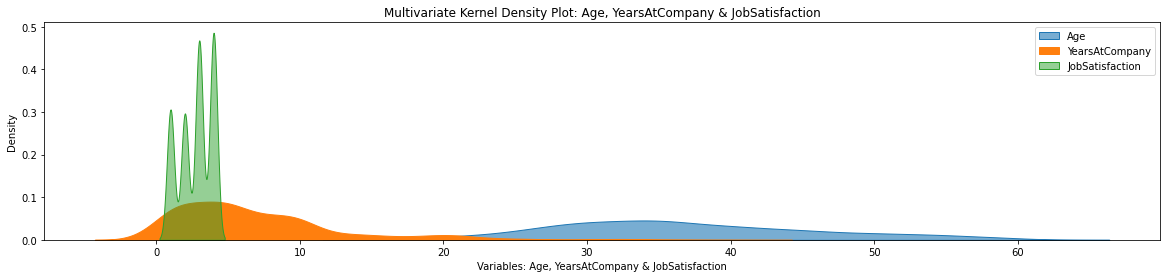

In [132]:
# Plotting KDE to see the columns heavily distributed

plt.figure(figsize=[20,4])
sns.kdeplot(data=data, x='Age', shade=True, alpha=0.6)
sns.kdeplot(data['YearsAtCompany'], shade=True, alpha=1.0)
sns.kdeplot(data['JobSatisfaction'], shade=True, alpha=0.5)
plt.title('Multivariate Kernel Density Plot: Age, YearsAtCompany & JobSatisfaction')
plt.xlabel('Variables: Age, YearsAtCompany & JobSatisfaction')
plt.ylabel('Density')
plt.legend(['Age','YearsAtCompany','JobSatisfaction']);

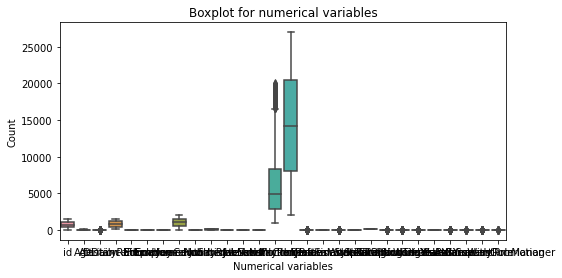

In [133]:
# Plotting box plot for all numerical variables
plt.figure(figsize=[8,4])
sns.boxplot(data=data)
plt.title('Boxplot for numerical variables')
plt.xlabel('Numerical variables')
plt.ylabel('Count');

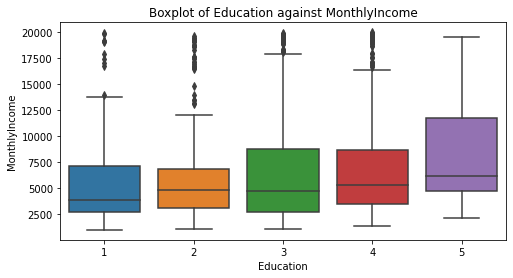

In [134]:
# Boxplot of Numerical variable

plt.figure(figsize=[8,4])
sns.boxplot(data=data, x='Education', y='MonthlyIncome')
plt.title('Boxplot of Education against MonthlyIncome')
plt.xlabel('Education')
plt.ylabel('MonthlyIncome');

# This shows the skewness of the plot of education against Monthly Income,
# This could explain that in some education level like below college, the income are highly dispersed which could probably be due to some
# of the employees in that eductation level might have good performance rating or monthly rating to have such high incomes.

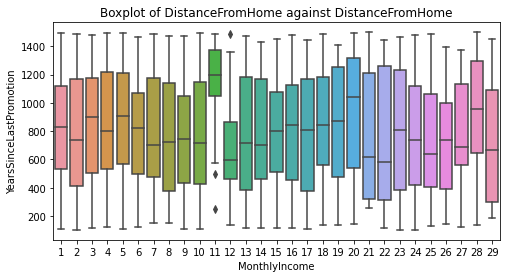

In [135]:
# Boxplot of Numerical variable

plt.figure(figsize=[8,4])
sns.boxplot(data=data, x='DistanceFromHome', y='DailyRate')
plt.title('Boxplot of DistanceFromHome against DistanceFromHome')
plt.xlabel('MonthlyIncome')
plt.ylabel('YearsSinceLastPromotion');

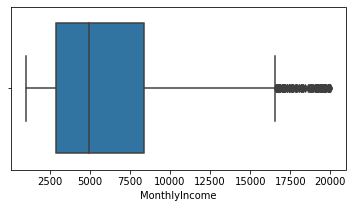

In [136]:
# Boxplot for rent: Univariate EDA
plt.figure(figsize=[6,3])
sns.boxplot(data=data, x='MonthlyIncome', fliersize=5, width=0.8); 
# This shows that there is skewness in the MonthlyIncome which is understandable,
# because there are different factors like department or levels that can cause this skewness

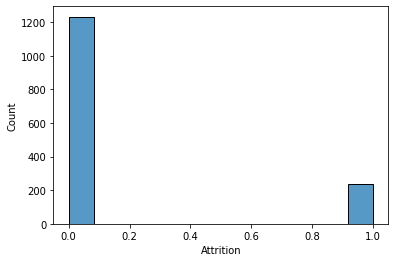

In [137]:
# Histogram plot: Univariate numrical variable
sns.histplot(data=data, x='Attrition');

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


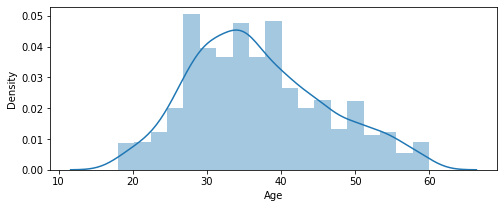

In [138]:
# Getting the distribution plot
plt.figure(figsize=[8,3])
sns.distplot(data['Age']); # This shows that age is a little skewed to the right.

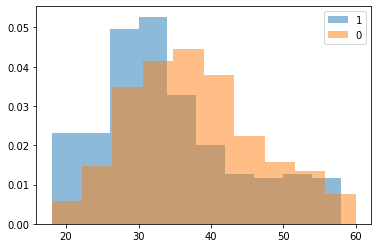

In [139]:
# Using histogram to view the relationship of Attrition and age
plt.figure(figsize=[6,4])
plt.hist(data[data['Attrition']==1]['Age'], label='1', alpha=0.5, density=True)
plt.hist(data[data['Attrition']==0]['Age'], label='0', alpha=0.5, density=True)
plt.legend()

# Questions to be ANSWERED

• What do you think are the 3 factors behind employee attrition?

• What is the relationship between Education and Monthly Income?

• What is the effect of age on attrition?

• Is Income the main factor in employee attrition?

• How does work-life balance impact the overall attrition rate?m

# **1**. Factors causing employee attrition

In [140]:
data.corr()

,id,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
id,1.000000,-0.010349,-0.010369,-0.051484,0.032928,0.041901,NaN,0.999906,0.017424,0.034754,-0.007105,-0.018041,-0.045941,-0.014377,0.012355,-0.000689,-0.013369,-0.020675,-0.069654,NaN,0.062452,-0.014095,0.023907,0.010740,-0.011557,-0.008853,-0.009151,-0.009432
Age,-0.010349,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.010369,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,-0.051484,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,0.032928,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.041901,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.999906,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.017424,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.034754,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


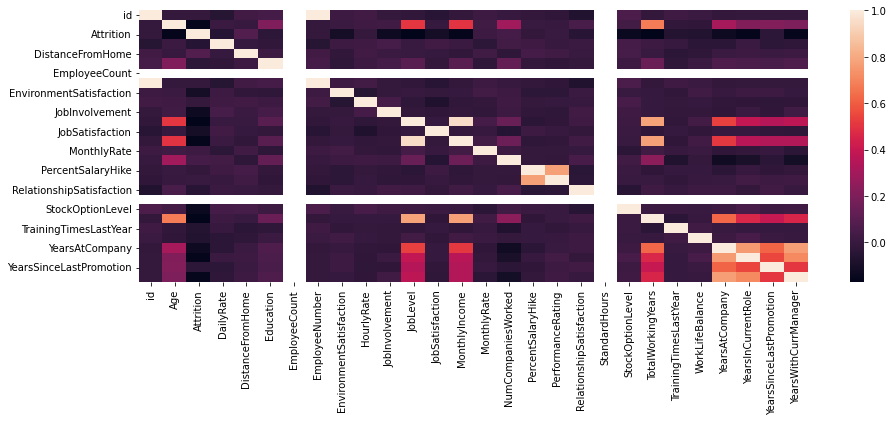

In [141]:
# Multivariate analysis: Numeric variables
plt.figure(figsize=[15,5])
sns.heatmap(data.corr(), fmt='.2f'); # Heatmap plot doesnt give a clear explanation/view of the data, specifically checking the corr 
# of Attrition to the rest columns to see the factors behind employee attrition.

In [155]:
data_corr = data.corr()
attr_factors= data_corr["Attrition"].abs().sort_values(ascending=False)
attr_factors.drop(attr_factors.index[0], inplace=True)
attr_factors.head(3)

# The three factors behind employee atrrition are "TotalWorkingYears", "JobLevel", "YearsInCurrentRole"

TotalWorkingYears     0.171063
JobLevel              0.169105
YearsInCurrentRole    0.160545
Name: Attrition, dtype: float64

Correlation Coeff. is: -0.1711


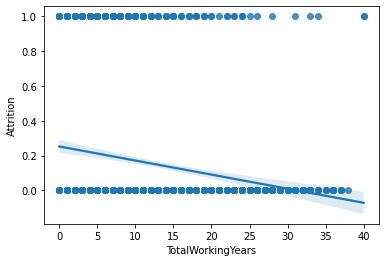

In [145]:
# Scatterplot
plt.figure(figsize=[6,4])
sns.regplot(data=data, x='TotalWorkingYears', y='Attrition')
corr_ = data['TotalWorkingYears'].corr(data['Attrition']).round(4)
print("Correlation Coeff. is: {}".format(corr_));

In [157]:
# Function to find correlation of Two columns 
def data_corr(df, x, y):
  # calculating the means of two colums
  x_mean = data[x].mean()
  y_mean = data[y].mean()

  # calculating standard deviation of the two columns
  x_std = data[x].std()
  y_std = data[y].std()

  # standardizing the columns and multiply, and then eventually, sum the dat
  total = (((data[x]-x_mean)/x_std)*((data[y]-y_mean)/y_std)).sum()
  corr = total/(data.shape[0]-1)

  return corr

In [158]:
data_corr(data, "TotalWorkingYears", "JobLevel")

0.7822078045362733

In [160]:
data_corr(data, "TotalWorkingYears", "YearsInCurrentRole")

0.46036463801180993

In [162]:
data_corr(data, "JobLevel", "YearsInCurrentRole")

0.38944673287667014

# **2**. Relationship btw education and monthly income

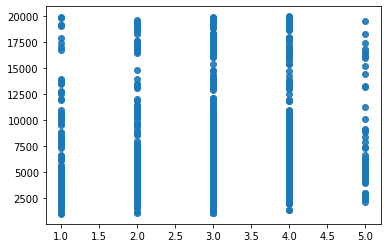

In [71]:
# Make a scatterplot that shows if there is a relationship between education and monthly income
scatter = plt.scatter(data['Education'], data['MonthlyIncome'], alpha=0.9);
scatter

In [163]:
data_corr(data, "Education", "MonthlyIncome") # This shows that this is a very weak positive relationship btw the two columns

0.09496067704188872

# **3**. What is the effect of age on attrition

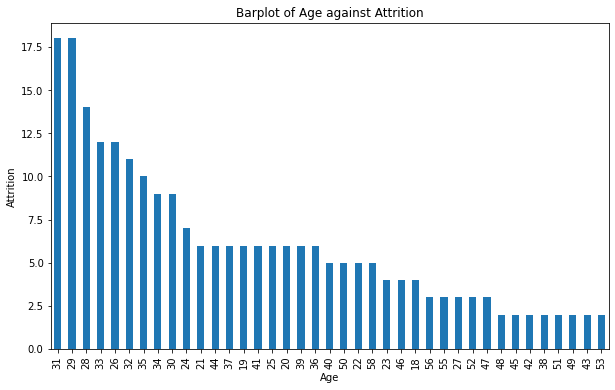

In [178]:
plt.figure(figsize=(10,6))
attr_mask = data[data["Attrition"] == 1]
attr_mask.head()

Age_attr = attr_mask.Age.value_counts()
Age_attr.plot(kind="bar")
plt.xlabel("Age")
plt.ylabel("Attrition")
plt.title("Barplot of Age against Attrition");

Correlation Coeff. is: -0.1592


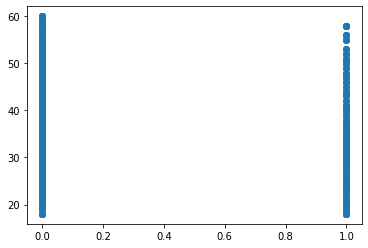

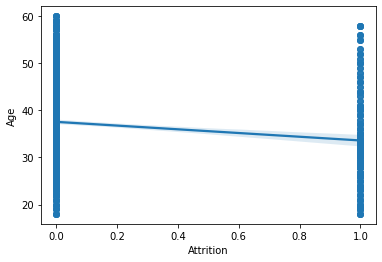

In [172]:
# Effect of Age on attrition
data["Attrition"].corr(data["Age"]) 

# Visualizing with a scatterplot to see the relationship
plt.scatter(data["Attrition"],data["Age"])

# Scatterplot
plt.figure(figsize=[6,4])
sns.regplot(data=data, x="Attrition", y="Age")
corr_ = data["Attrition"].corr(data["Age"]).round(4)
print("Correlation Coeff. is: {}".format(corr_));


# **4**. Is income the main factor in employee attrition

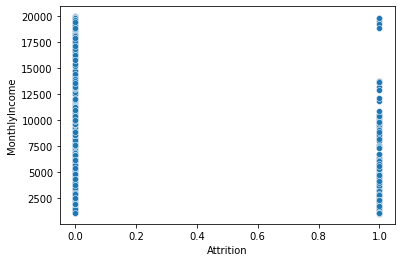

In [184]:
# scatter plot
plt.figure(figsize=[6,4])
sns.scatterplot(data=data, x='Attrition', y='MonthlyIncome'); # From this clear view of a scatterplot, it shows no relationship with attrition, therefore cannot be a main factor.

In [186]:
data_corr(data,"Attrition", "MonthlyIncome") # No, Income isnt the main factor of attrition, because it has a weak negative correlation.



-0.15983958238498872

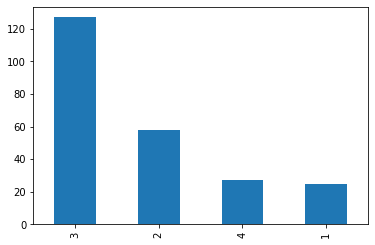

In [173]:
attr_mask = data[data["Attrition"] == 1]
attr_mask.head()

#attr_mask.plot(kind="bar", x= "WorkLifeBalance", y="Attrition")
WorkLife = attr_mask.WorkLifeBalance.value_counts()
WorkLife.plot(kind="bar");

# **5** How does 'work-life-balance" impact the overall attrition rate?

In [187]:
data_corr(data, "Attrition","WorkLifeBalance") # This shows that it doesnt have an impact in the overall attrition rate due to its weak negative correlation with attrition.

-0.06393904721740906

In [206]:
print(data_corr(data, "PerformanceRating", "Attrition").round(4))
print(data_corr(data, "PercentSalaryHike", "Attrition").round(4))

# This shows that the two columns that had one, ifnot the only strong correlation with itself, has the lowest correlation with 'employee Attrition'.

0.0029
-0.0135


# CONCLUSION

#### My conclusions in these analysis are:
* Firstly, in the entire data, there are few positive attritions i.e, a few 'YES' in the attrition column and a majority of "NO" in the attrition column in the data.
* Secondly, applying scatterplots and correlation function, there is barely any relationship of employee attrition to the columns 
  in the data which can be clearly said that it is the factor of attrition in the company, the highest relationship is about 0.15 or there about.
* Lastly, i noticed the columns barely have strong relationships with themselves, the highest noticed is about 0.77 i.e "PerformanceRating"